In [5]:
import pandas as pd

df_monthly=pd.read_csv("./data/monthly_csv.csv")

# 시계열 자료를 년도와 월로 나눠 시간 순으로 정렬
df_monthly['Year'] = pd.DatetimeIndex(df_monthly['Date']).year
df_monthly['Month'] = pd.DatetimeIndex(df_monthly['Date']).month
df_monthly.set_index(["Date"])


,Price,Year,Month
Date,,,
1950-01,34.730,1950,1
1950-02,34.730,1950,2
1950-03,34.730,1950,3
1950-04,34.730,1950,4
1950-05,34.730,1950,5
...,...,...,...
2020-03,1593.764,2020,3
2020-04,1680.030,2020,4
2020-05,1715.697,2020,5


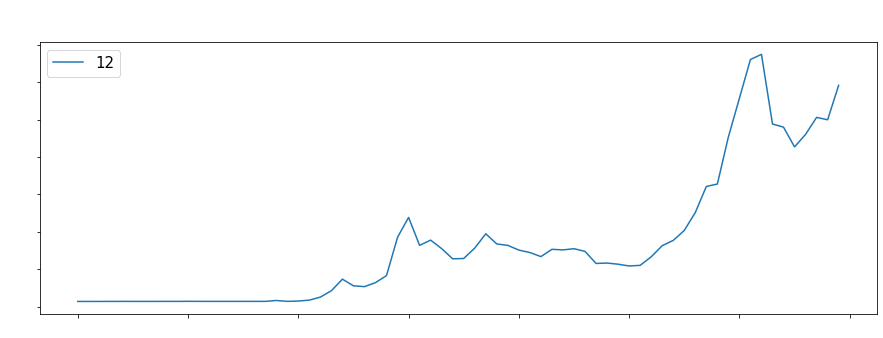

In [8]:
df_annual=pd.read_csv("./data/annual_csv.csv")

# 시계열 자료를 년도와 월로 나눠 시간 순으로 정렬
df_annual['Year'] = pd.DatetimeIndex(df_annual['Date']).year
df_annual['Month'] = pd.DatetimeIndex(df_annual['Date']).month
df_annual.set_index(["Date"])

import matplotlib.pyplot as plt

# 연간 금 가격 추세 시각화
fig,axes=plt.subplots(figsize=(15,5))

x=df_annual['Year']
y=df_annual['Price']

plt.plot(x,y)
plt.tick_params(labelcolor="white")
plt.title("Visualize gold price trends by year.",color="#fff",fontsize =20,pad=20)
plt.legend(df_annual["Month"],loc=2,fontsize =15)
plt.show()

<ipython-input-9-acba4f893920>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(),size=20,color="#fff")
<ipython-input-9-acba4f893920>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(),size=20,color="#fff")


Text(0.5, 1.0, 'Visualize gold price trends for each year by month.')

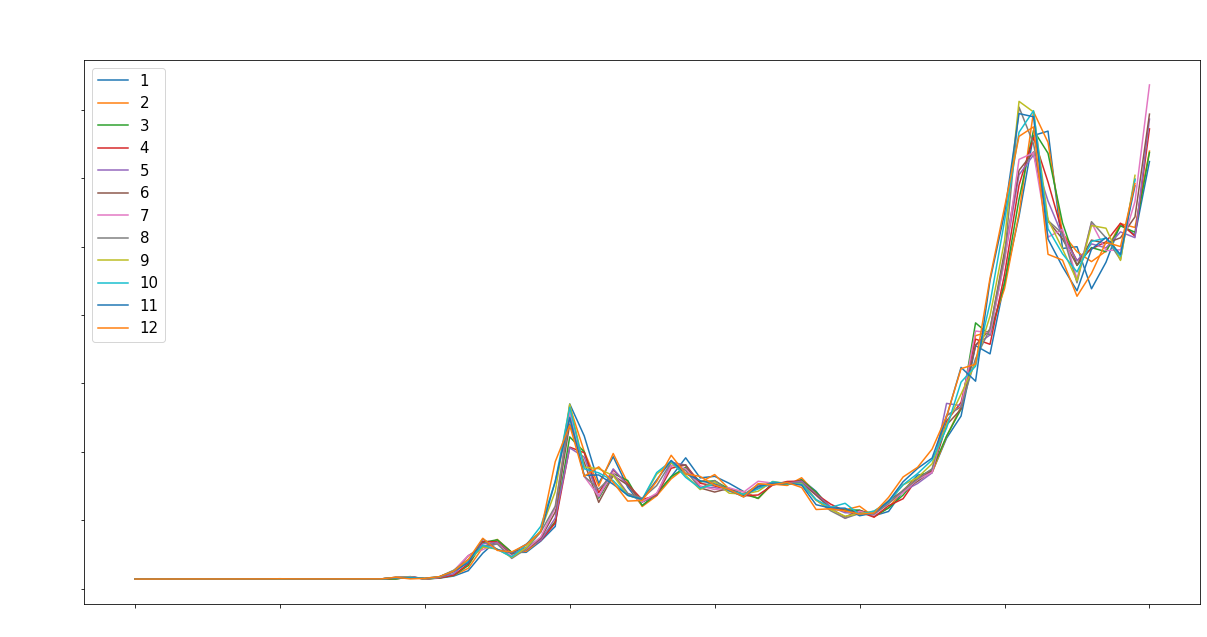

In [9]:
import matplotlib.pyplot as plt

# 매년 금 가격 추세를 월별로 시각화 
fig,axes=plt.subplots(figsize=(20,10))
arr=[]
for i in range(1,13):
    a=df_monthly[df_monthly["Month"]==i]
    x=a["Year"]
    y=a["Price"]
    axes.plot(x,y)
    arr.append(i)
    
axes.set_xticklabels(axes.get_xticks(),size=20,color="#fff")
axes.set_yticklabels(axes.get_yticks(),size=20,color="#fff")
axes.legend(arr,loc=2,fontsize =15)
axes.set_title("Visualize gold price trends for each year by month.",color="#fff",fontsize =30,pad=30) 

In [155]:
#print(df_annual["Price"].max())
#print(df_annual["Price"].min())
#print(len(df_annual["Price"]))

In [27]:
# ----------------------------------------
import numpy as np
import random
price=df_monthly["Price"].to_numpy()

train_x=[]
train_y=[]

test_x=price[-10:-1]
test_y=price[-1]

for i in range(price.shape[0]-10):
    #print(price[i:i+9])
    train_x.append(price[i:i+9])
    #print(price[i+9])
    train_y.append(price[i+9])
    
train_x=np.array(trainset)
train_y=np.array(labelset)
train_x=np.reshape(trainset,(-1,9,1))


In [28]:
train_x.shape

(837, 9, 1)

In [29]:
train_y.shape

(837,)

LSTM(Long Short -Trem Memory)
- 기본 RNN은 BPTT에서 기울기의 손실 혹은 폭발이 일어나 장기 의존 관계를 학습하기 어려운 문제점이 있었다 .이 문제점을 보완하기 위해 LSTM이 나왔다
    <img src="./image/LSTM.png" height="500px" width="700px" >
- 기본 RNN과 다르게 LSTM계층에는 c(memory cell, 기억 셀)이 있다
- c(memory cell, 기억 셀)
    - LSTM의 기억 메거니즘이다
    - c(t)는 과거로 부터 현재의 timestep까지의 필요한 모든 정보가 들어있다고 가정한다.
    - 출력하는 h(t)는 기억 셀의 값을 tanh함수로 변환한 값이다
    - c(t)와 h(t)의 원소 수는 같다
    <img src="./image/cell state.png" height="500px" width="700px" >
- 게이트
    - LSTM에서 사용하는 게이트는 열기/닫기, 어느 정도 열지를 조절한다
      (게이트를 얼마나 열지는 데이터로부터(자동적으로) 학습한다)
    - 게이트의 열림상태(어느 정도)는 0.0 ~ 1.0 사이의 실수로 나타낸다
      그래서 게이트의 열림상태를 구할때는 시그모이드 함수를 사용한다
      (시그모이드 함수의 출력은 0.0 ~ 1.0사이의 실수이다)
    - 게이터의 열림상태를 제어하기 위해 전용 가중치 매개변수를 이용하며, 이 가중치 매개변수는 학습데이터로부터 갱신된다
    1. output gate
        - 다음 은닉 상태 h(t)의 출력을 담당하는 게이트
        - 열린 상태(어느 정도 보낼지)는 입력 x(t)와 이전 상태 h(t)로부터 구한다
    <img src="./image/output gate.png" height="500px" width="700px" >

        - tanh의 출력 : -1.0 ~ 1.0의 실수
            - 이 수치를 그 안에 인코딩된 정보의 강약(정도)을 표시한다고 해석한다
            - 실질적인 정보를 지니는 데이터에 활성화 함수로 tanh를 사용한다
        - sigmoid의 출력 : 0.0 ~ 1.0의 실수
            - 데이터를 얼마만큼 통과 시킬지를 결정하는 비율
            - 게아트에서 사용하는 활성화 함수이다
    2. forget gate
        - c(t-1)의 기억 중에서 불필요한 기억을 잊게하기 위한 게이트
        <img src="./image/forget gate.png" height="500px" width="700px" >
    * tanh 노드 추가하여 새롭게 기억할 셀 추가 
        - c(t)에 새로운 정보가 추가된다
        - tanh 노드는 게이트가 아니며, 새로운 정보를 기억 셀에 추가하기 위해 사용한다
    3. input gate
        - 새롭게 추가된 정보의 가치가 얼마나 큰지 판단하기 위한 게이트
        - 아무렇게나 정보를 업데이트하는게 아니라 적절한 정보인지 판단하는 것이 이 게이트의 역할\
        <img src="./image/input gate.png" height="500px" width="700px" >
        
https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr \
밑바닥부터 시작하는 딥러닝 2

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# 모델 생성
inputs=tf.keras.Input(shape=(9,1),name="input")

# 기억 셀(cell state)과 hidden state에 대한 출력을 바꾸는 변수 -> return_sequences, return_state 인자
# return_sequences, return_state 인자가 false일 경우 마지막 hidden state값만 출력됨
# layers.LSTM(출력 차원 수 ,return_sequences =True : 각 타임스텝별로 hidden state를 모두 출력하게 됨 )
lstw1=layers.LSTM(6,return_sequences=True)(inputs)
# 여러 층을 쌓아 더 복잡한 패턴을 학습할 수 있게한다(정확도가 높아질 수 있다)
lstw2=layers.LSTM(6)(lstw1)
di=layers.Dense(6,activation="relu")(lstw2)
outputs=layers.Dense(1)(di)

model=tf.keras.Model(inputs=inputs,outputs=outputs)  

# 모델 학습과정 설정 
# ------------------------------------
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss=tf.keras.losses.MeanSquaredError(),
             metrics=["mse"])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 9, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 9, 6)              192       
_________________________________________________________________
lstm_1 (LSTM)                (None, 6)                 312       
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [38]:
# model.fit은 model.compile에서 지정한 방식으로 학습을 진행함 **
# compile에서 정한 metrics를 반환하여, 기록을 살펴봄 **
# fit(X(Numpy array 또는 TensorFlow tensor),Y(Numpy 어레이 또는 TensorFlow 텐서),epochs,batch_size)
# -----------------------------------------------
model.fit(train_x,train_y,epochs=15,batch_size=100)

Epoch 1/15
9/9 [==============================] - 0s 5ms/step - loss: 215964.0000 - mse: 215964.0000
Epoch 2/15
9/9 [==============================] - 0s 5ms/step - loss: 207249.7188 - mse: 207249.7188
Epoch 3/15
9/9 [==============================] - 0s 5ms/step - loss: 206689.7344 - mse: 206689.7344
Epoch 4/15
9/9 [==============================] - 0s 5ms/step - loss: 221208.7031 - mse: 221208.7031
Epoch 5/15
9/9 [==============================] - 0s 5ms/step - loss: 207531.9219 - mse: 207531.9219
Epoch 6/15
9/9 [==============================] - 0s 5ms/step - loss: 206737.2500 - mse: 206737.2500
Epoch 7/15
9/9 [==============================] - 0s 5ms/step - loss: 205815.9375 - mse: 205815.9375
Epoch 8/15
9/9 [==============================] - 0s 5ms/step - loss: 205257.4844 - mse: 205257.4688
Epoch 9/15
9/9 [==============================] - 0s 5ms/step - loss: 205002.9375 - mse: 205002.9375
Epoch 10/15
9/9 [==============================] - 0s 5ms/step - loss: 204691.9531 - mse: 2

In [36]:
# predict(X(Numpy array 또는 TensorFlow tensor))
model.predict(np.reshape(test_x,(-1,9,1)))


array([[41.9118]], dtype=float32)